# **Comprehensive Cardiovascular Disease Data Analysis and Application**


>[Advanced Cardiovascular Risk Prediction](#scrollTo=_KmfWQEn0oVM)

>>[Overview](#scrollTo=vIEAWiOIDBHA)

>>[Objectives](#scrollTo=vIEAWiOIDBHA)

>>[Team Composition](#scrollTo=vIEAWiOIDBHA)

>>[Timeline and Methodology](#scrollTo=vIEAWiOIDBHA)

>>[Deliverables](#scrollTo=vIEAWiOIDBHA)

>[Conclusion](#scrollTo=vIEAWiOIDBHA)

>[Data description](#scrollTo=Jjz7AfG2PZWu)

>[Feature Engineering](#scrollTo=3hyNJ5qKjZRI)



## Project Overview
This project aims to leverage machine learning techniques to predict cardiovascular disease based on clinical and demographic data. By analyzing historical patient data, we intend to uncover risk factors, develop predictive models, and implement these models in a real-world health application.


## Background
Cardiovascular diseases (CVDs) are a top cause of death globally, taking an estimated 17.9 million lives each year, according to the World Health Organization. Utilizing data science to predict cardiovascular disease can help in early diagnosis and potentially save lives through timely intervention.


## Data Description
The dataset for this project comes from a public health database. It includes records for 70,000 patients with features such as age, gender, blood pressure, cholesterol level, and other medical history indicators. This comprehensive dataset provides a basis for developing robust predictive models.

## Overview
The project aims to identify and analyze the key risk factors for cardiovascular disease (CVD), utilizing data analytics and machine learning.\
The focus will be on uncovering actionable insights that can predict CVD risk and identify high-risk patient groups, facilitating timely interventions.
## Objectives
1. Key Risk Factors Identification: Use feature importance and exploratory data analysis to highlight significant predictors of CVD.
2. Predictive Model Development: Construct an accurate model to assess the risk of CVD among individuals.
3. Patient Segmentation: Efficiently segment patients based on risk factors to identify those at highest risk.
## Team Composition
* Project Manager: Coordinates the project, ensuring timely progress and effective communication.\
*	Data Analysts (2): Conduct data cleaning and exploratory analysis, providing initial insights.\
* Data Scientists (2): Develop the predictive model and perform clustering analysis, focusing on rapid iteration and validation.\
*	Data Engineer: Ensures data is accessible and structured for analysis, supporting rapid data operations.
## Timeline and Methodology
The project will be initiated immediately, with an aggressive but achievable timeline of 3.5 weeks, culminating in the presentation of findings and actionable strategies to stakeholders.\
Week 1: Data preparation and exploratory analysis to quickly grasp key patterns and anomalies.\
Week 2: Intensive focus on feature engineering and predictive modeling, with iterations based on preliminary results.\
Week 3: Complete model validation, refine patient segmentation, and begin drafting of insight reports.\
Week 3.5: Finalize reports, prepare a comprehensive presentation, and rehearse findings.
## Deliverables
1. A concise report detailing exploratory data analysis findings and key insights.
2. An analysis of feature importance, emphasizing CVD risk factors.
3. A validated predictive model for assessing CVD risk, complete with documentation and user guidance.
4. A patient segmentation report, identifying and describing high-risk groups.
5. Targeted recommendations for interventions aimed at the identified high-risk groups.
6. A final presentation to stakeholders, summarizing findings, methodologies, and actionable recommendations.
# Conclusion
This project is designed to deliver critical insights into the prevention and management of CVD in a condensed timeframe. By leveraging a focused approach and the specialized skills of the analytics team, we aim to provide the client with valuable tools for identifying and intervening with high-risk individuals, thus making a significant impact on public health outcomes in a short period.


**EXPLORATORY DATA ANALYSIS**

In [ ]:
! pip install numpy pandas matplotlib seaborn scikit-learn xgboost eli5 shap scikit-plot

In [ ]:
# Core libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import math

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt  # Simplified plotting for ML models
from IPython.display import HTML

# Statistical analysis
import statsmodels.api as sm

# Machine learning models and utilities
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (accuracy_score, roc_auc_score, mean_squared_error, recall_score, precision_score, roc_curve, auc,
                             silhouette_score, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error,
                             mean_absolute_error, r2_score, confusion_matrix, precision_recall_curve, average_precision_score,
                             classification_report, ConfusionMatrixDisplay)
from sklearn.datasets import load_iris, make_regression, make_classification

# Ensemble and boosting frameworks
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

# Model explanation libraries
import shap
import eli5

# Model serialization
import joblib
import pickle

# Library to control warning messages
import warnings
warnings.filterwarnings('ignore')  # Ignore all warning messages

In [ ]:
# Loading Dataset
path = 'cardio_train.csv'
df = pd.read_csv(path,delimiter=';')
#Display the first few rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Data description**

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1:Female, 2:Male |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

**Data cleaning**

In [ ]:
#Checking for missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no missing values in this dataset

In [ ]:
#Checking for duplicate rows
duplicates = df[df.duplicated()]

if len(duplicates) > 0:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


There are no duplicated rows in this data set

**Summary Statistics**

In [ ]:
#concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#summary statistics for the data set
summary = df.describe()
print('summary statistics', summary)

summary statistics                  id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.47253

In [ ]:
#Counting the number of unique values for categorical columns.
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
unique_value_counts = df[categorical_columns].nunique()

print("Number of unique values for each categorical column:")
print(unique_value_counts)

Number of unique values for each categorical column:
gender         2
cholesterol    3
gluc           3
smoke          2
alco           2
active         2
cardio         2
dtype: int64


**Data Visualization**

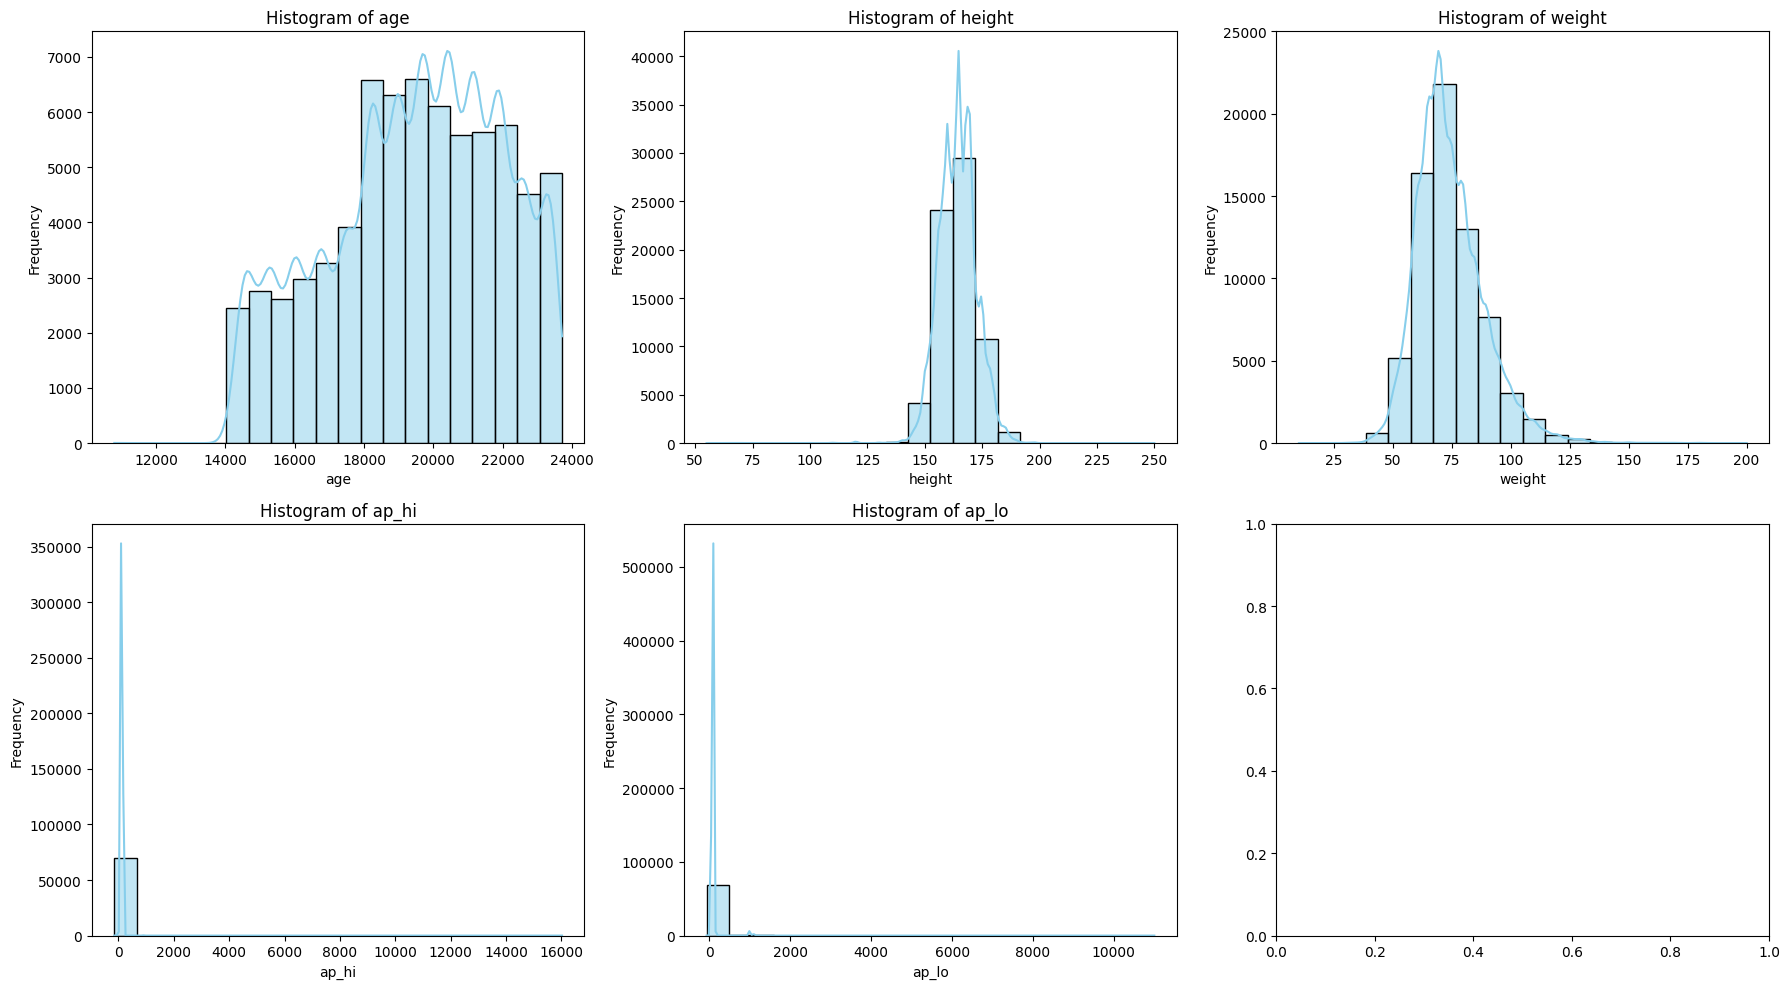

In [ ]:
#Visualizing the distribution of numerical variables using histograms

numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=20, color='skyblue', ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

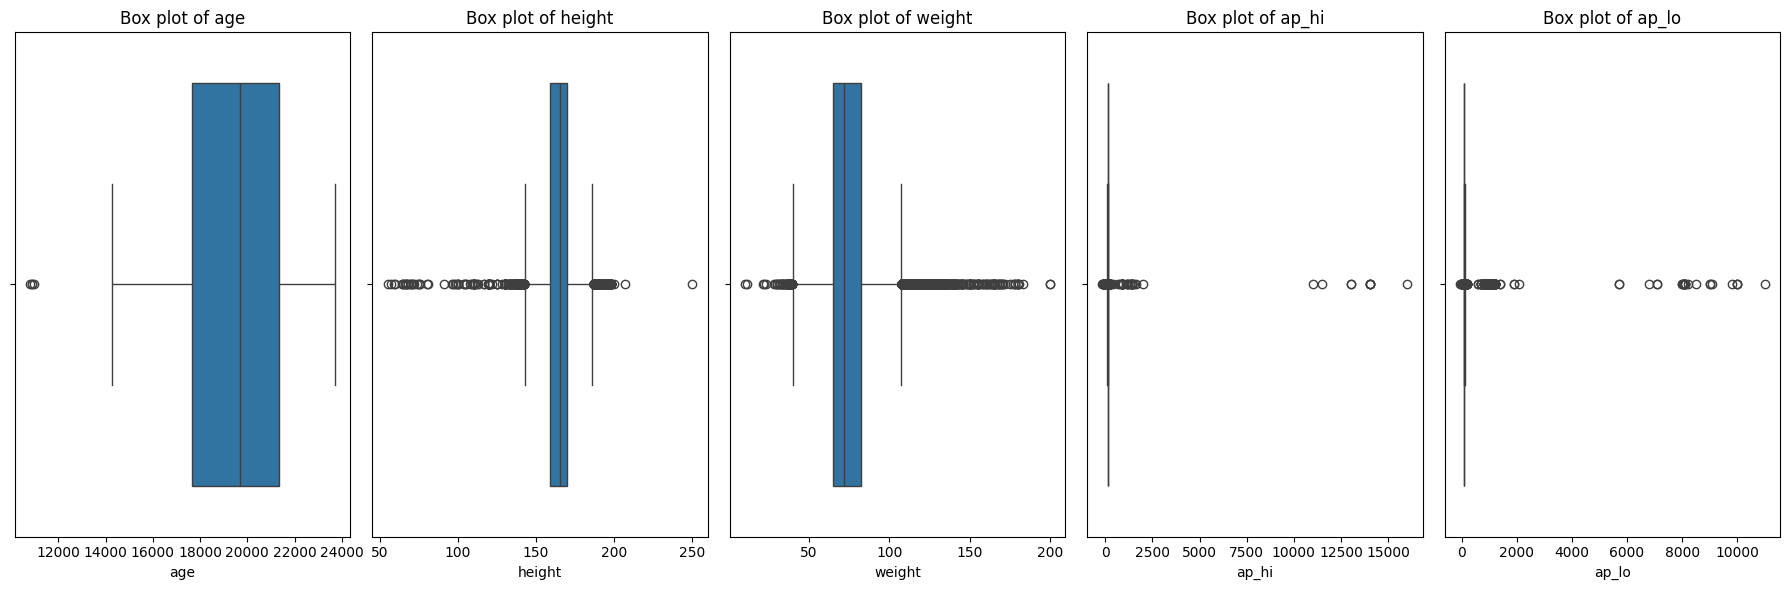

In [ ]:
# box plot plotting to check on outliers
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(18, 6))

# Plotting box plots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
    axes[i].set_xlabel(col)

# Adjusting layout
plt.tight_layout()
plt.show()

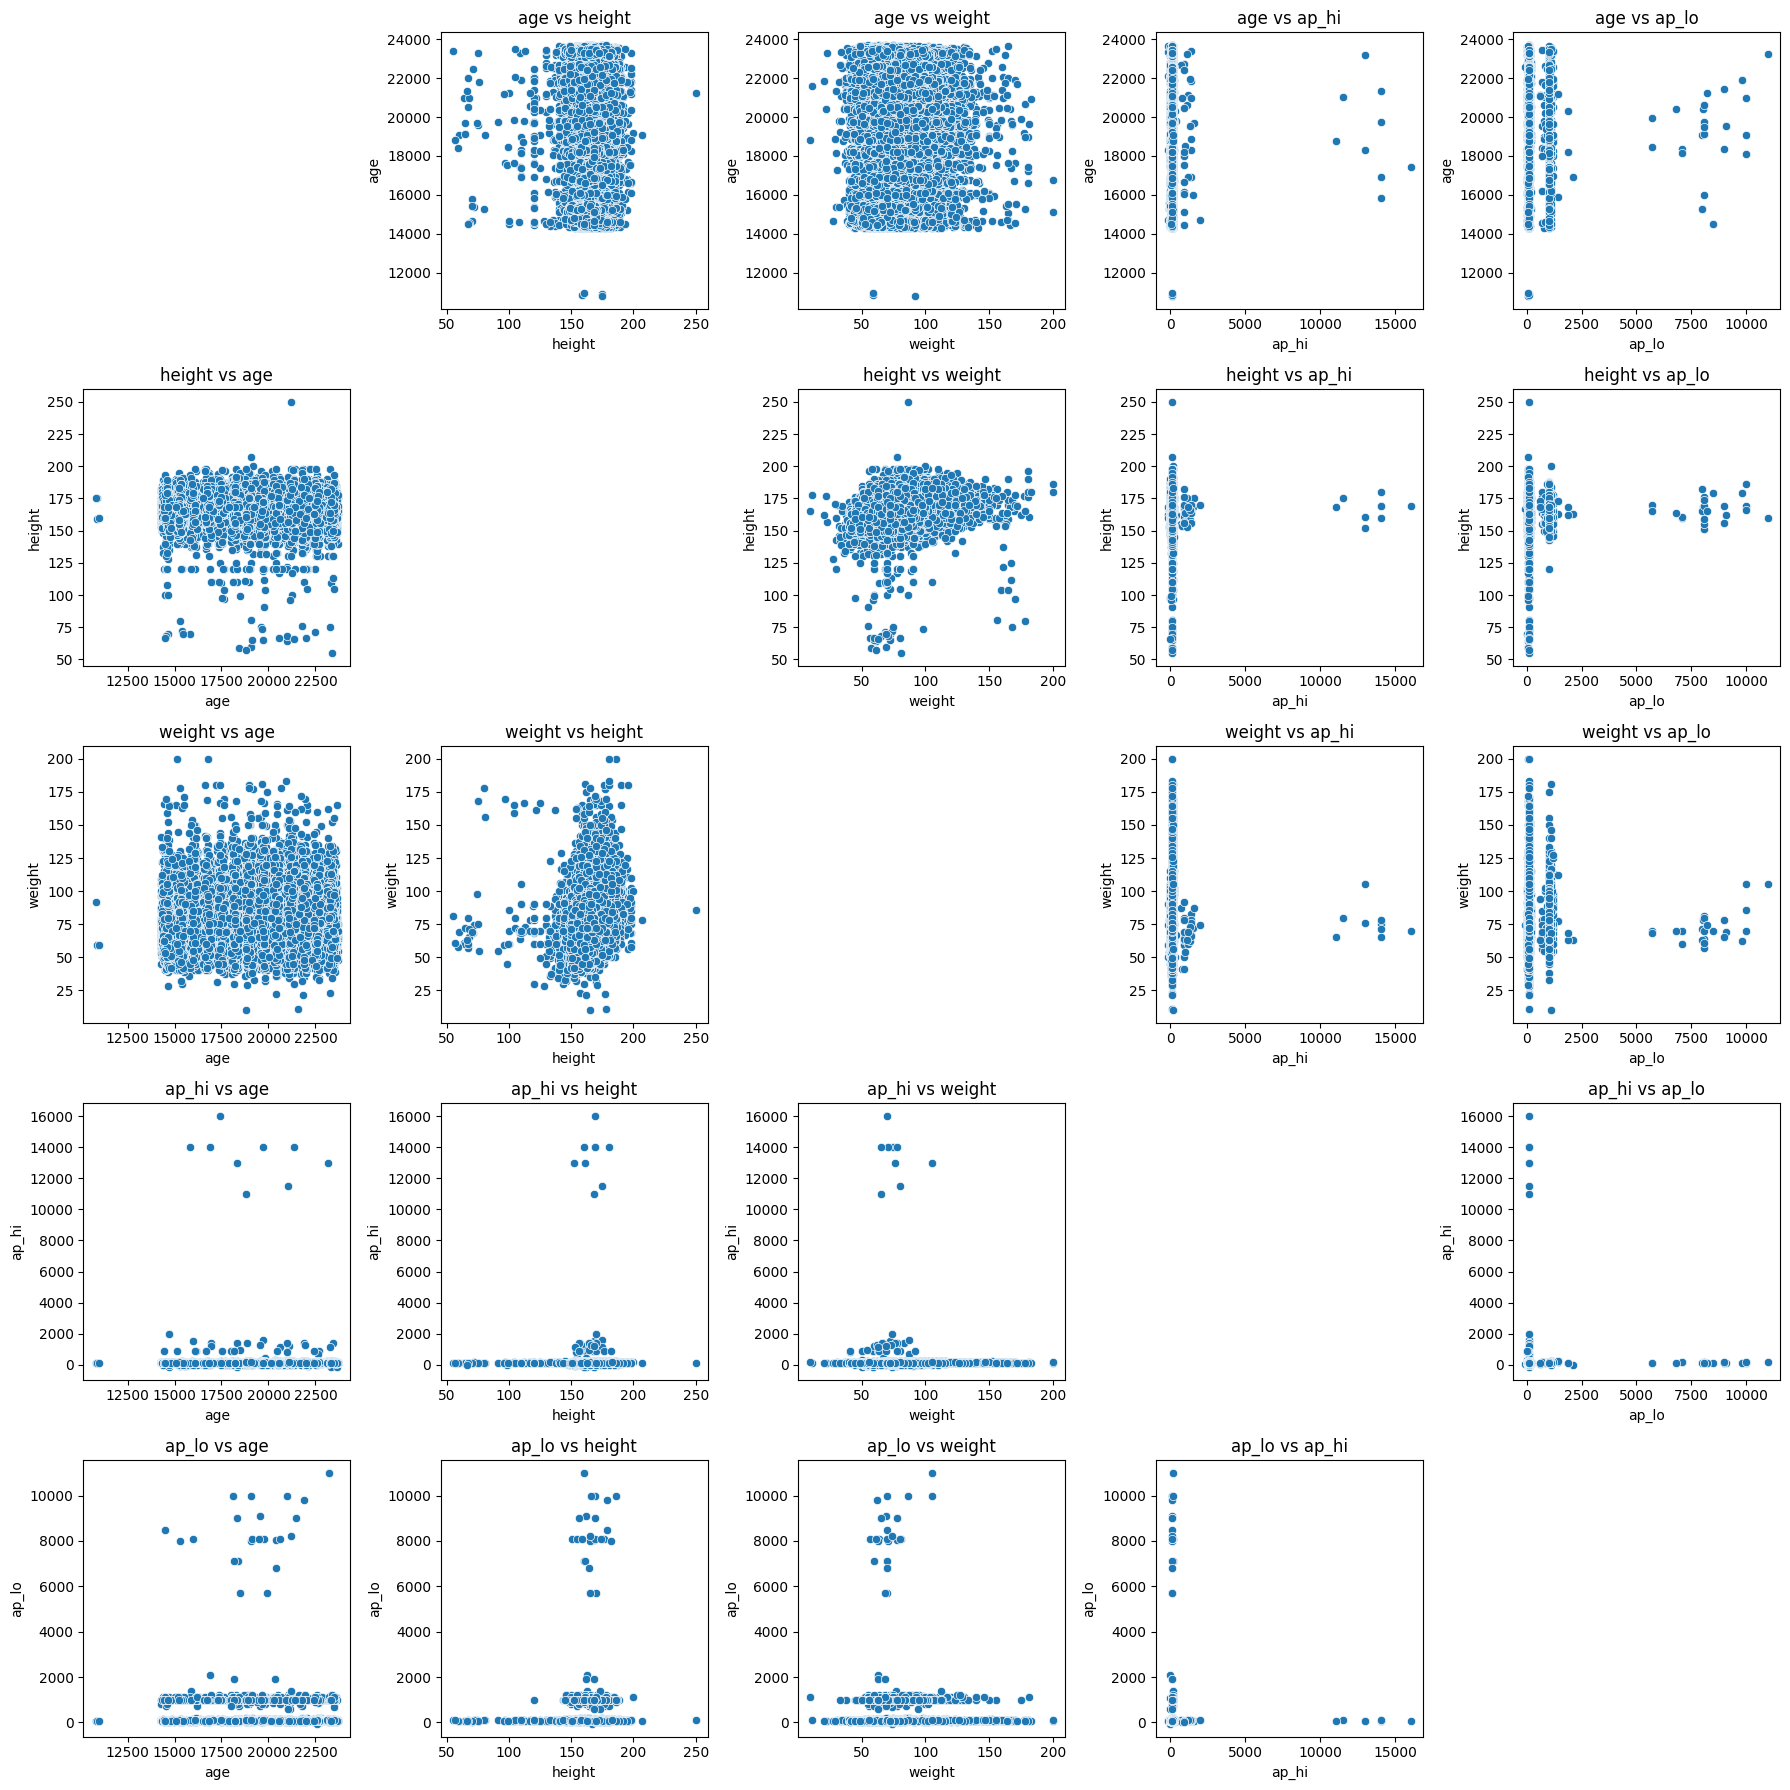

In [ ]:
#Exploring the relationship between numerical variables using scatter plot
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Creating subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(numerical_columns), figsize=(18, 18))

# Plotting scatter plots for each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i != j:
            sns.scatterplot(x=df[numerical_columns[j]], y=df[numerical_columns[i]], ax=axes[i, j])
            axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
            axes[i, j].set_xlabel(numerical_columns[j])
            axes[i, j].set_ylabel(numerical_columns[i])
        else:
            axes[i, j].axis('off')

# Adjusting layout
plt.tight_layout()
plt.show()

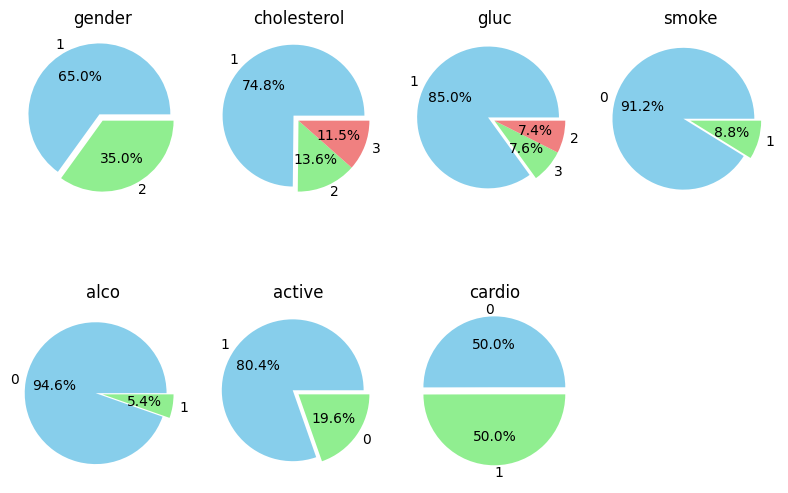

In [ ]:
#distribution of categorical features

# categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
# Defining the number of rows and columns for subplots
num_rows = 2
num_cols = (len(categorical_columns) + num_rows - 1) // num_rows

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
axes = axes.flatten()

# Plotting pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()
    explode = [0.1] + [0] * (len(value_counts) - 1)  # Explode the first slice
    value_counts.plot(kind='pie', autopct='%1.1f%%',
                      colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'],
                      explode=explode, shadow=False, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('')

# Hiding empty subplots
for j in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()

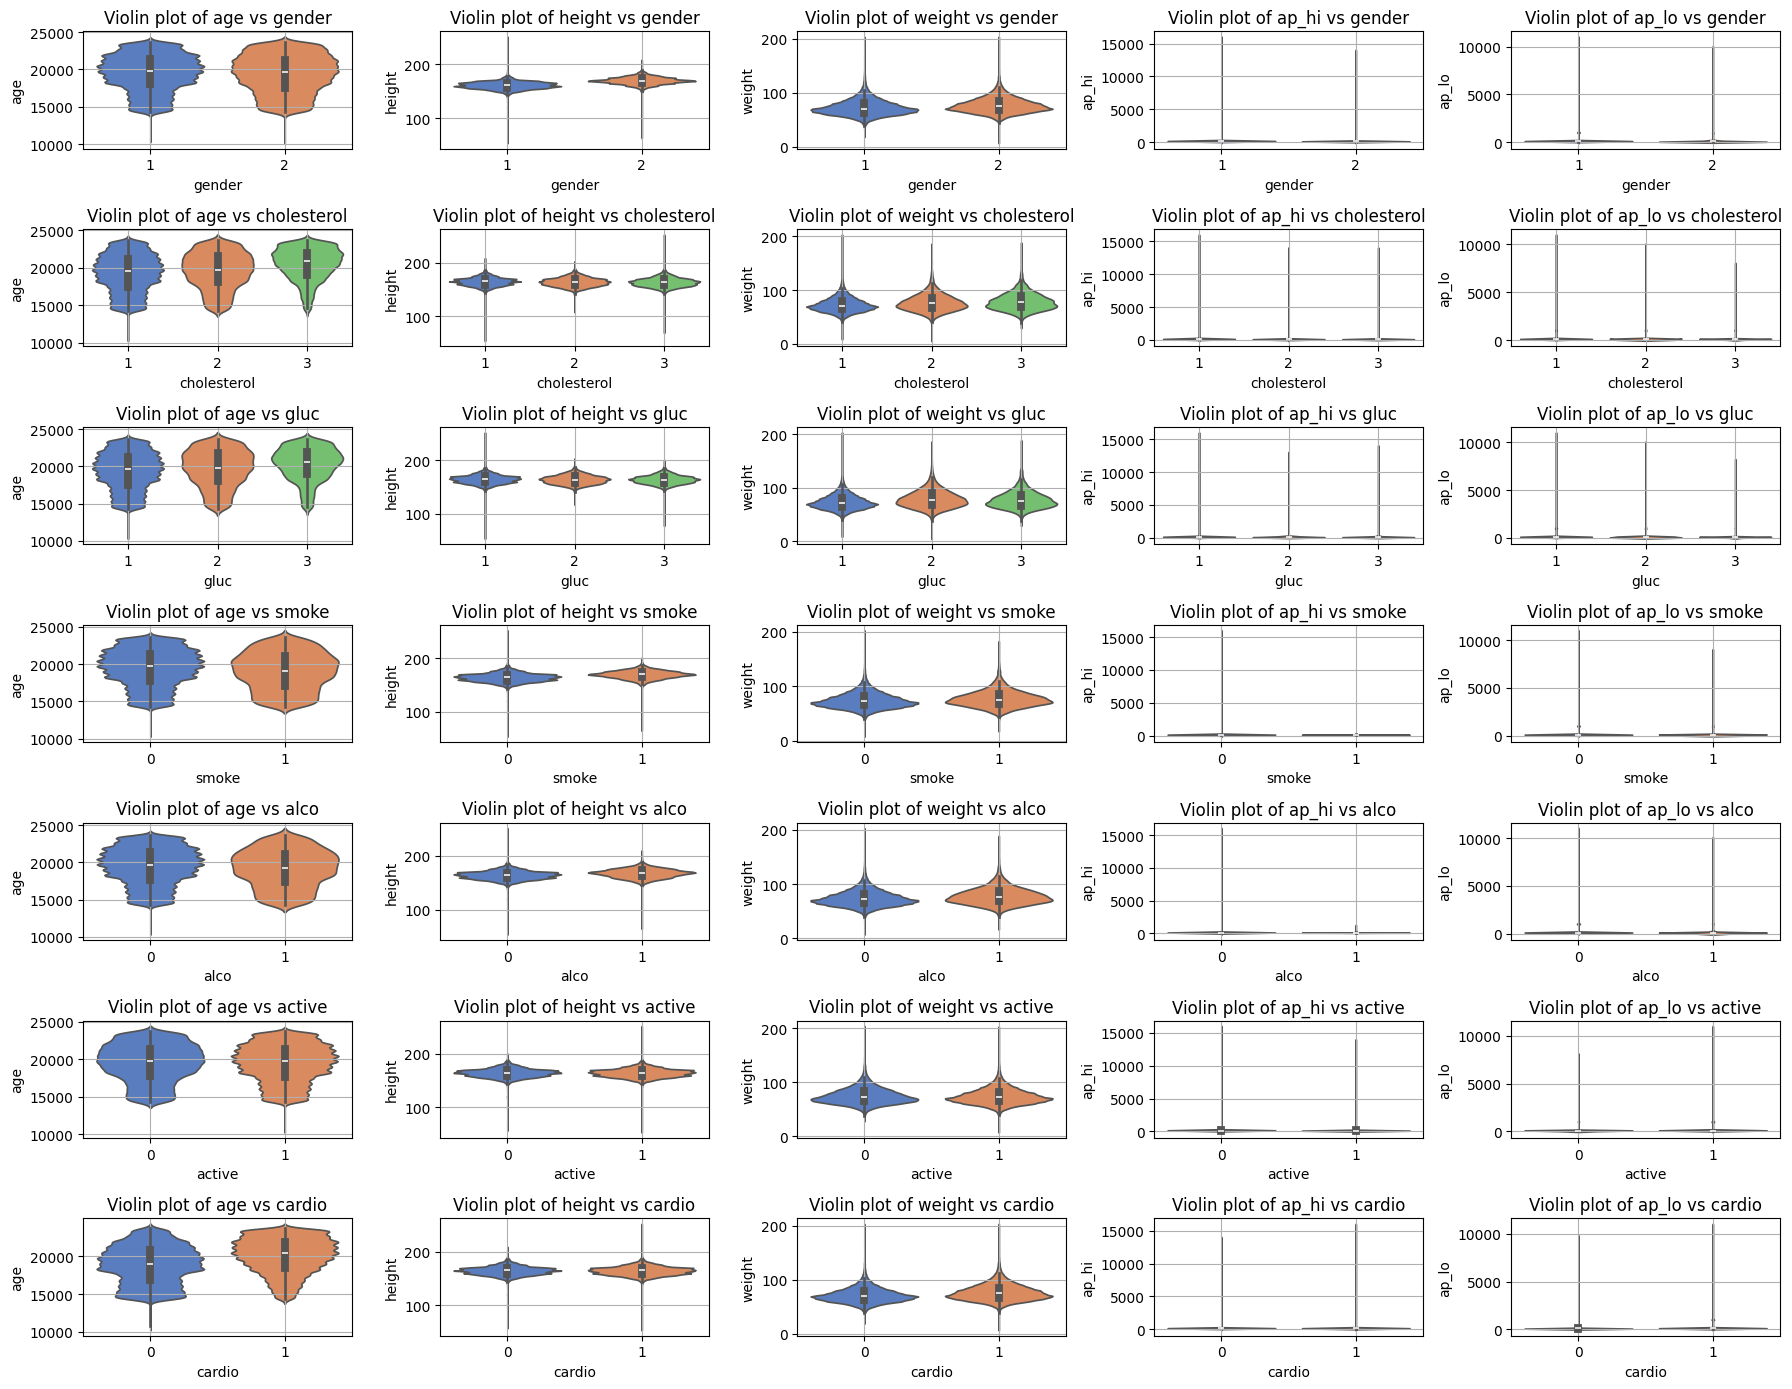

In [ ]:
#Exploring the relationship between categorical and numerical variables using  violin plots.
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


# Defining the number of rows and columns for subplots
num_rows = len(categorical_columns)
num_cols = len(numerical_columns)

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 14))
axes = axes.flatten()

# Plotting violin plots for each pair of categorical and numerical columns
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        sns.violinplot(x=cat_col, y=num_col, data=df, ax=axes[i * num_cols + j], palette="muted")
        axes[i * num_cols + j].set_title(f'Violin plot of {num_col} vs {cat_col}')
        axes[i * num_cols + j].set_xlabel(cat_col)
        axes[i * num_cols + j].set_ylabel(num_col)
        axes[i * num_cols + j].grid(True)

# Adjusting layout
plt.tight_layout()
plt.show()

**Correlation Analysis**

In [ ]:
# Calculating correlation matrix of numerical variables
numerical_columns = ['cardio','age', 'height', 'weight', 'ap_hi', 'ap_lo']
correlation_matrix = df[numerical_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          cardio       age    height    weight     ap_hi     ap_lo
cardio  1.000000  0.238159 -0.010821  0.181660  0.054475  0.065719
age     0.238159  1.000000 -0.081515  0.053684  0.020764  0.017647
height -0.010821 -0.081515  1.000000  0.290968  0.005488  0.006150
weight  0.181660  0.053684  0.290968  1.000000  0.030702  0.043710
ap_hi   0.054475  0.020764  0.005488  0.030702  1.000000  0.016086
ap_lo   0.065719  0.017647  0.006150  0.043710  0.016086  1.000000


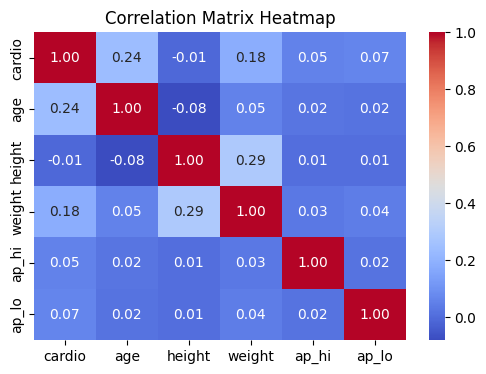

In [ ]:
#Visualizing the correlation matrix using a heatmap to identify strong correlations between variables.
numerical_columns = ['cardio','age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Calculating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

**Exploring the Target Variable**

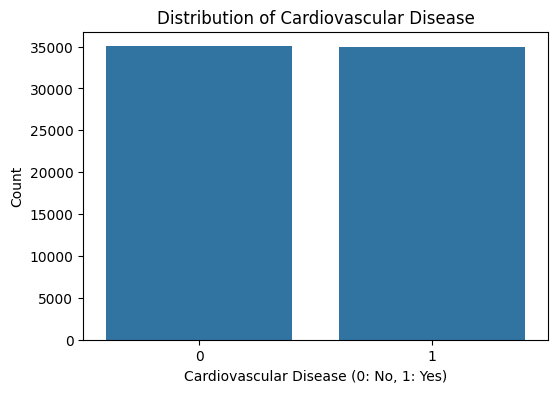

In [ ]:
#Checking the distribution of the target variable to understand class imbalance.

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cardio')
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

The target variable 'cardio' appears to be balanced, with approximately equal representation of both classes (0 and 1).

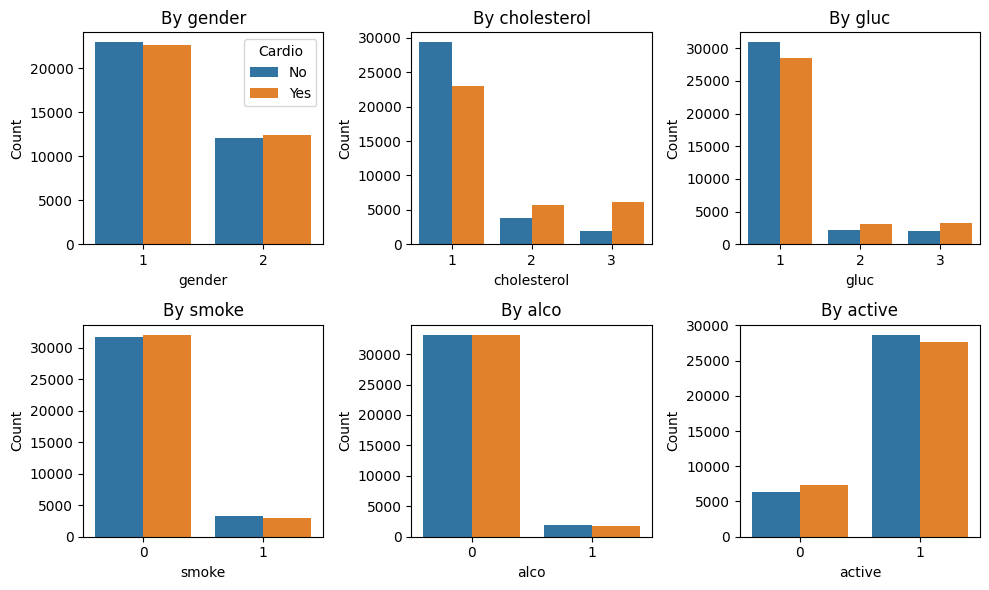

In [ ]:
#Visualizing the relationship between the target variable and other features
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Set up the matplotlib figure for a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))  # Adjust size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting bar plots for each categorical feature by Cardiovascular Disease
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='cardio', ax=axes[i])
    axes[i].set_title(f'By {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

    # Optionally, you can show the legend only on the first subplot or last subplot
    if i == 0:  # or i == len(categorical_features) - 1 for the last subplot
        axes[i].legend(title='Cardio', labels=['No', 'Yes'], loc='best')
    else:
        axes[i].legend([],[], frameon=False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

The factors analysed above, cannot be used in isolation to determine the risk of cardiovacular disease.

#Feature Engineering


First task is to convert age from days to years.

In [ ]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365.25).round().astype(int)

# Categorize age in groups of 5
def categorize_age_years(age_years):
    if age_years < 40:
        return 1 #Under 40
    elif 40 <= age_years < 45:
        return 2 #40-44
    elif 45 <= age_years < 50:
        return 3 #45-49
    elif 50 <= age_years < 55:
        return 4 #50-54
    elif 55 <= age_years < 60:
        return 5 #55-59
    elif 60 <= age_years < 65:
        return 6 #60-64
    else:
        return 7 #Over 65

# Apply the function to categorize age_years
df['age_category'] = df['age_years'].apply(categorize_age_years)

# Display the distribution of the BMI categories
df['age_category'].value_counts(normalize=True) * 100

age_category
4    27.598571
5    22.967143
6    22.091429
2    13.704286
3    12.565714
1     0.677143
7     0.395714
Name: proportion, dtype: float64

Next, is to create a new BMI column which is a better risk factor to use to determine the risk of cardiovascular disease.

In [ ]:
#creating a BMI column by dividing height/weight squared
## Calculate BMI: BMI = weight (kg) / (height (m))^2
df['BMI'] = (df['weight'] / ((df['height'] / 100) ** 2)).round()

Then categorize the BMI into underweight, normal, overweight, obese using codes 1,2,3,4 respectively

In [ ]:
 #creating a BMI column by dividing height/weight squared
## Calculate BMI: BMI = weight (kg) / (height (m))^2
df['BMI'] = (df['weight'] / ((df['height'] / 100) ** 2)).round()

# Categorize BMI according to WHO standards
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 1 #Underweight
    elif 18.5 <= bmi < 25:
        return 2 #Normal Weight
    elif 25 <= bmi < 30:
        return 3 #Overweight
    else:
        return 4 #Obese

# Apply the function to categorize BMI
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Display the distribution of the BMI categories
df['BMI_Category'].value_counts(normalize=True) * 100

BMI_Category
3    39.037143
2    31.421429
4    28.612857
1     0.928571
Name: proportion, dtype: float64

In [ ]:
 # Function to categorize blood pressure
def categorize_blood_pressure(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 1 #Normal
    elif 120 <= row['ap_hi'] <= 129 and row['ap_lo'] < 80:
        return 2 #Elevated
    elif 130 <= row['ap_hi'] <= 139 or 80 <= row['ap_lo'] <= 89:
        return 3 #Hypertension Stage 1
    elif row['ap_hi'] >= 140 or row['ap_lo'] >= 90:
        return 4 #Hypertension Stage 2
    elif row['ap_hi'] > 180 or row['ap_lo'] > 120:
        return 5 #Hypertensive Crisis
    else:
        return 0 #Uncategorized

# Apply the function to categorize blood pressure
df['BP_Category'] = df.apply(categorize_blood_pressure, axis=1)

# Display the distribution of the BP categories
df['BP_Category'].value_counts(normalize=True) * 100

BP_Category
3    57.048571
4    24.761429
1    13.725714
2     4.464286
Name: proportion, dtype: float64

In [ ]:
# Calculate pulse pressure
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

# Print the first few rows to check the calculated pulse pressure
print(df[['ap_hi', 'ap_lo', 'pulse_pressure']].head())

# Assuming you have your data loaded into a DataFrame called df
# Replace df with your DataFrame if it's named differently

# Define a function to categorize pulse pressure
def categorize_pulse_pressure(pulse_pressure):
    if pulse_pressure <= 40:
        return 1 # Normal
    elif pulse_pressure <= 60:
        return 2 # Elevated
    else:
        return 3 # High

# Apply the categorization function to create a new column 'pulse_pressure_category'
df['pulse_pressure_category'] = df['pulse_pressure'].apply(categorize_pulse_pressure)

# Display the distribution of the pulse pressure categories
df['pulse_pressure_category'].value_counts(normalize=True) * 100


   ap_hi  ap_lo  pulse_pressure
0    110     80              30
1    140     90              50
2    130     70              60
3    150    100              50
4    100     60              40


pulse_pressure_category
1    60.924286
2    32.704286
3     6.371429
Name: proportion, dtype: float64

## **Summary of new feature categories**

- Age Categories
1. Under 40
2. Age 40-44
3. Age 45-49
4. Age 50-54
5. Age 55-59
6. Age 60-64
7. Over 65

- BMI Categories
1. Underweight
2. Normal Weight
3. Overweight
4. Obese

- Blood Pressure Categories
0. Uncategorized
1. Normal
2. Elevated
3. Hypertension Stage 1
4. Hypertension Stage 2
5. Hypertensive Crisis

- Pulse Pressure Categories
1. Normal
2. Elevated
3. High

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_category,BMI,BMI_Category,BP_Category,pulse_pressure,pulse_pressure_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4,22.0,2,3,30,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,5,35.0,4,4,50,2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,4,24.0,2,3,60,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,3,29.0,3,4,50,2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,3,23.0,2,1,40,1


In [ ]:
# checking correlation of features after creating BMI column and categorizing  BMI and BP levels.


# Calculate correlation
correlation_with_cardio = df[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                              'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years',
                              'BMI', 'BMI_Category', 'BP_Category','pulse_pressure', 'cardio']].corr()['cardio'].sort_values(ascending=False)
print("Positive values indicate a positive correlation, while negative values indicate a negative correlation.")
print(correlation_with_cardio)


Positive values indicate a positive correlation, while negative values indicate a negative correlation.
cardio            1.000000
BP_Category       0.348026
age               0.238159
age_years         0.237802
cholesterol       0.221147
BMI_Category      0.184858
weight            0.181660
BMI               0.165262
gluc              0.089307
ap_lo             0.065719
ap_hi             0.054475
gender            0.008109
id                0.003799
alco             -0.007330
height           -0.010821
smoke            -0.015486
pulse_pressure   -0.016550
active           -0.035653
Name: cardio, dtype: float64


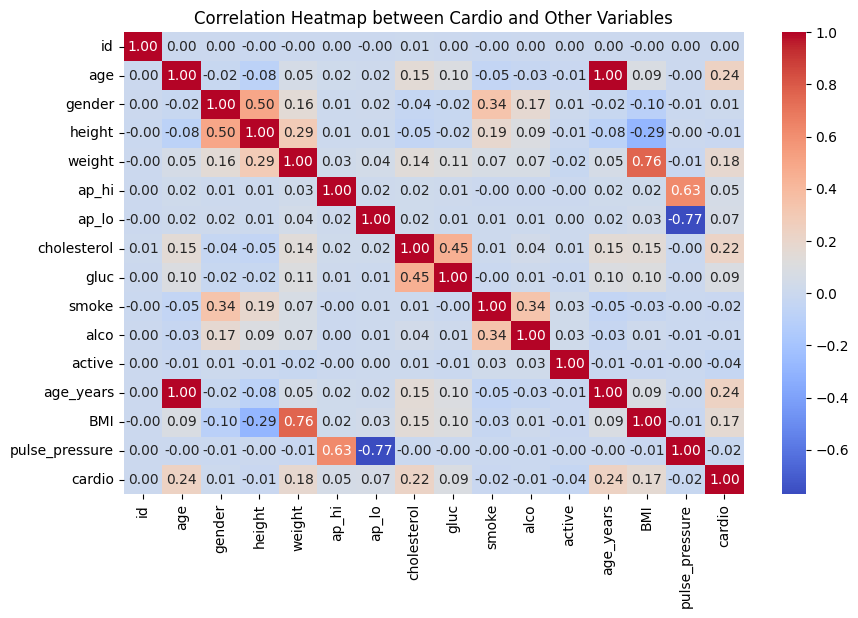

In [ ]:
# checking correlation using a heatmap

# Calculate correlation
correlation_matrix = df[['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'age_years',
                        'BMI','pulse_pressure','cardio']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap between Cardio and Other Variables')
plt.show()


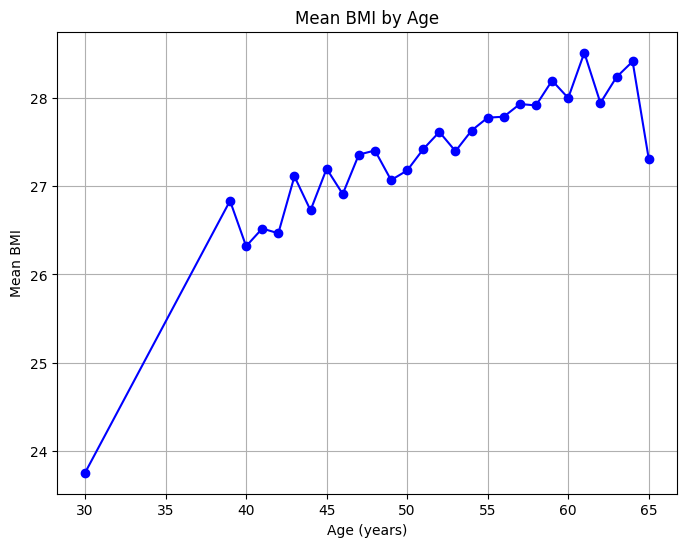

In [ ]:
#relationship between age and BMI

# Calculate the mean BMI for each age group
mean_bmi_by_age = df.groupby('age_years')['BMI'].mean()

# Plotting the relationship between age and mean BMI
plt.figure(figsize=(8, 6))
mean_bmi_by_age.plot(kind='line', marker='o', color='b')
plt.title('Mean BMI by Age')
plt.xlabel('Age (years)')
plt.ylabel('Mean BMI')
plt.grid(True)
plt.show()


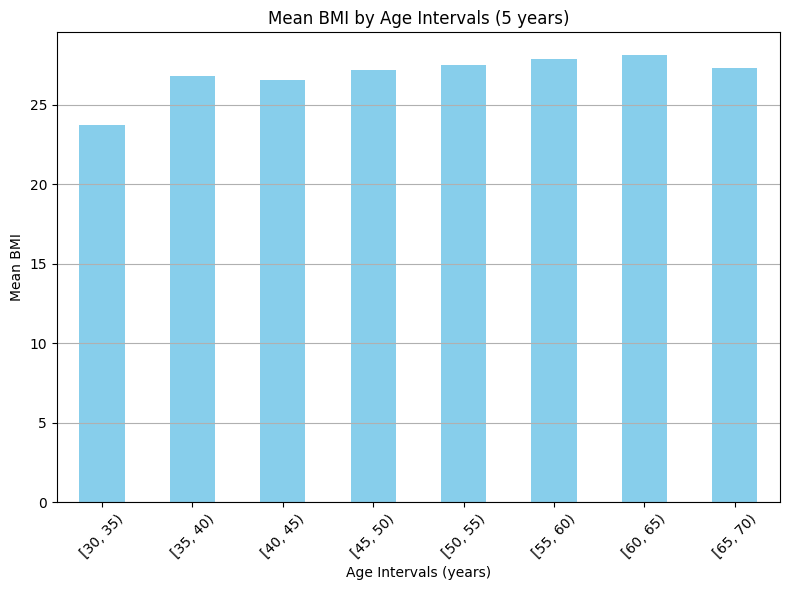

In [ ]:

# Define age intervals of 5 years
age_intervals = pd.cut(df['age_years'], bins=range(30, 75, 5), right=False)

# Calculate the mean BMI for each age interval
mean_bmi_by_age_interval = df.groupby(age_intervals)['BMI'].mean()

# Plotting the relationship between age intervals and mean BMI using a bar graph
plt.figure(figsize=(8, 6))
mean_bmi_by_age_interval.plot(kind='bar', color='skyblue')
plt.title('Mean BMI by Age Intervals (5 years)')
plt.xlabel('Age Intervals (years)')
plt.ylabel('Mean BMI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



This bar graph  may not be a true representation of the average BMI per age group due to non uniformity in the number of respondents in each age group.


In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_category,BMI,BMI_Category,BP_Category,pulse_pressure,pulse_pressure_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4,22.0,2,3,30,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,5,35.0,4,4,50,2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,4,24.0,2,3,60,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,3,29.0,3,4,50,2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,3,23.0,2,1,40,1


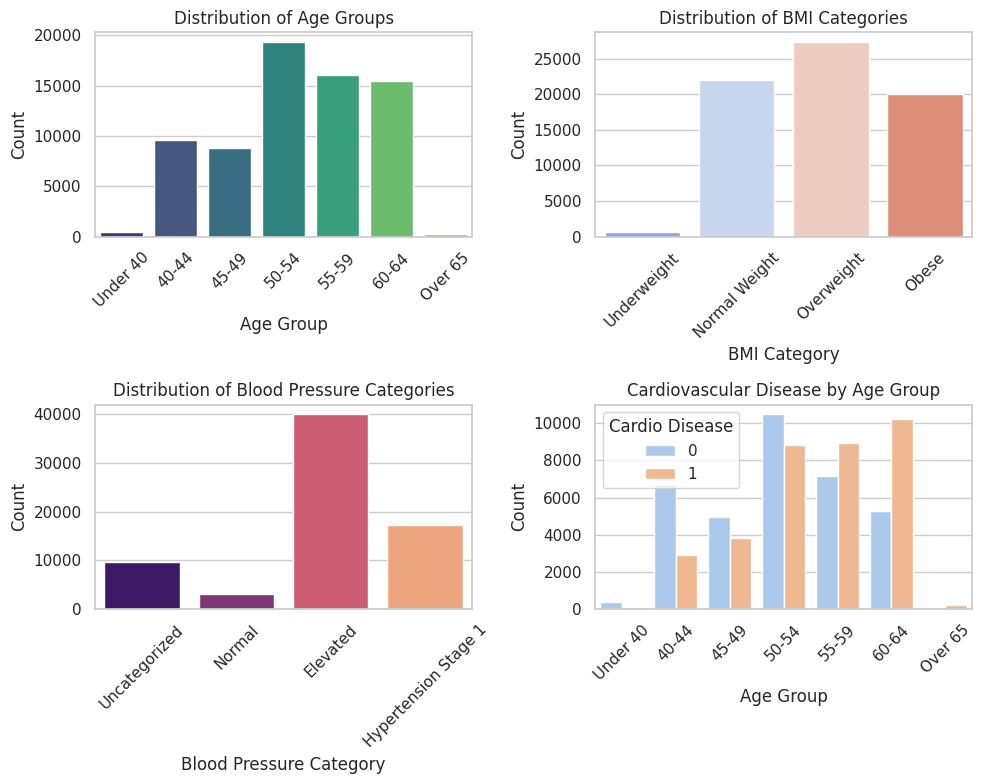

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to host the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Category names
age_categories = ['Under 40', '40-44', '45-49', '50-54', '55-59', '60-64', 'Over 65']
bmi_categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
bp_categories = ['Uncategorized', 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
pulse_categories = ['Normal', 'Elevated', 'High']

# Histogram of Age Groups
sns.countplot(ax=axes[0, 0], x='age_category', data=df, palette='viridis')
axes[0, 0].set_title('Distribution of Age Groups')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticklabels(age_categories, rotation=45)

# Histogram of BMI Categories
sns.countplot(ax=axes[0, 1], x='BMI_Category', data=df, palette='coolwarm')
axes[0, 1].set_title('Distribution of BMI Categories')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(bmi_categories, rotation=45)

# Histogram of Blood Pressure Categories
sns.countplot(ax=axes[1, 0], x='BP_Category', data=df, palette='magma')
axes[1, 0].set_title('Distribution of Blood Pressure Categories')
axes[1, 0].set_xlabel('Blood Pressure Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticklabels(bp_categories, rotation=45)

# Bar Chart of Cardiovascular Disease Presence by Age Group
sns.countplot(ax=axes[1, 1], x='age_category', hue='cardio', data=df, palette='pastel')
axes[1, 1].set_title('Cardiovascular Disease by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Cardio Disease')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticklabels(age_categories, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# **Removing outliers**

Blood Pressure: We chose to limit systolic (ap_hi) and diastolic (ap_lo) blood pressure to reasonable adult ranges, such as systolic from 90 to 250 mmHg, and diastolic from 60 to 150 mmHg.\
Height and Weight: Remove heights below 50 cm and above 250 cm.
In the same way, filter out weights below 30 kg or above 200 kg as they are less likely to be accurate.

In [ ]:
# Define reasonable ranges for each feature
valid_ap_hi_range = (50, 250)
valid_ap_lo_range = (30, 180)
valid_height_range = (50, 250)  # cm
valid_weight_range = (30, 200)   # kg
min_age_days = 18 * 365.4  # Minimum age in days

# Apply filters to remove outliers
filtered_data = df[
    (df['ap_hi'].between(*valid_ap_hi_range)) &
    (df['ap_lo'].between(*valid_ap_lo_range)) &
    (df['height'].between(*valid_height_range)) &
    (df['weight'].between(*valid_weight_range)) &
    (df['age'] >= min_age_days)
]

# Compare the shape of the data before and after filtering to see how many rows were removed
original_shape = df.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape

((70000, 20), (68772, 20))

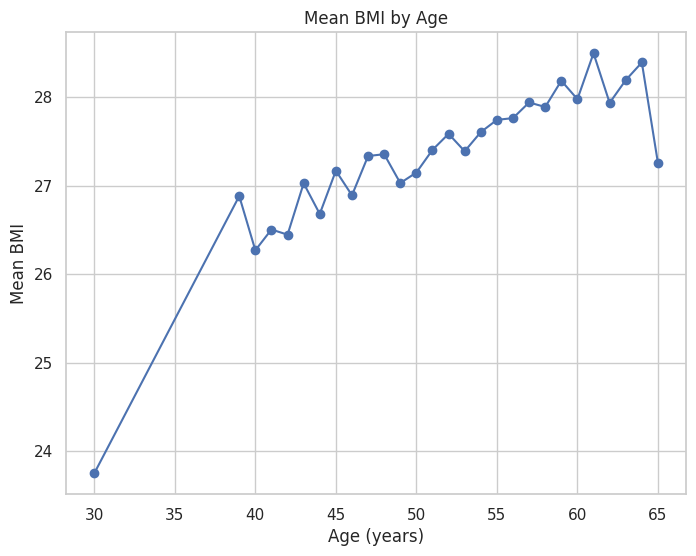

In [ ]:
#Relationship between age and BMI after dropping outliers

# Calculating the mean BMI for each age group
mean_bmi_by_age = filtered_data.groupby('age_years')['BMI'].mean()
# Plotting the relationship between age and mean BMI
plt.figure(figsize=(8, 6))
mean_bmi_by_age.plot(kind='line', marker='o', color='b')
plt.title('Mean BMI by Age')
plt.xlabel('Age (years)')
plt.ylabel('Mean BMI')
plt.grid(True)
plt.show()

Clustering & Segmentation


In [ ]:
filtered_data.dtypes

id                           int64
age                          int64
gender                       int64
height                       int64
weight                     float64
ap_hi                        int64
ap_lo                        int64
cholesterol                  int64
gluc                         int64
smoke                        int64
alco                         int64
active                       int64
cardio                       int64
age_years                    int64
age_category                 int64
BMI                        float64
BMI_Category                 int64
BP_Category                  int64
pulse_pressure               int64
pulse_pressure_category      int64
dtype: object

In [ ]:
filtered_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_category,BMI,BMI_Category,BP_Category,pulse_pressure,pulse_pressure_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,4,22.0,2,3,30,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,5,35.0,4,4,50,2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,4,24.0,2,3,60,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,3,29.0,3,4,50,2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,3,23.0,2,1,40,1


In [ ]:
# Compute the Pearson correlation matrix
correlation_matrix = filtered_data.corr()

# Extract correlation with the target variable
target_correlation = correlation_matrix['cardio'].drop('cardio', errors='ignore')  # Drop self-correlation to avoid irrelevant 100%

# Convert to percentage and round
target_correlation_percent = (target_correlation * 100).round(0)

# Sort the values in descending order
sorted_correlation = target_correlation_percent.sort_values(ascending=False)
print(sorted_correlation)

ap_hi                      43.0
pulse_pressure_category    34.0
ap_lo                      34.0
BP_Category                34.0
pulse_pressure             32.0
age                        24.0
age_years                  24.0
age_category               23.0
cholesterol                22.0
weight                     18.0
BMI_Category               18.0
BMI                        16.0
gluc                        9.0
gender                      1.0
id                          0.0
alco                       -1.0
height                     -1.0
smoke                      -2.0
active                     -4.0
Name: cardio, dtype: float64


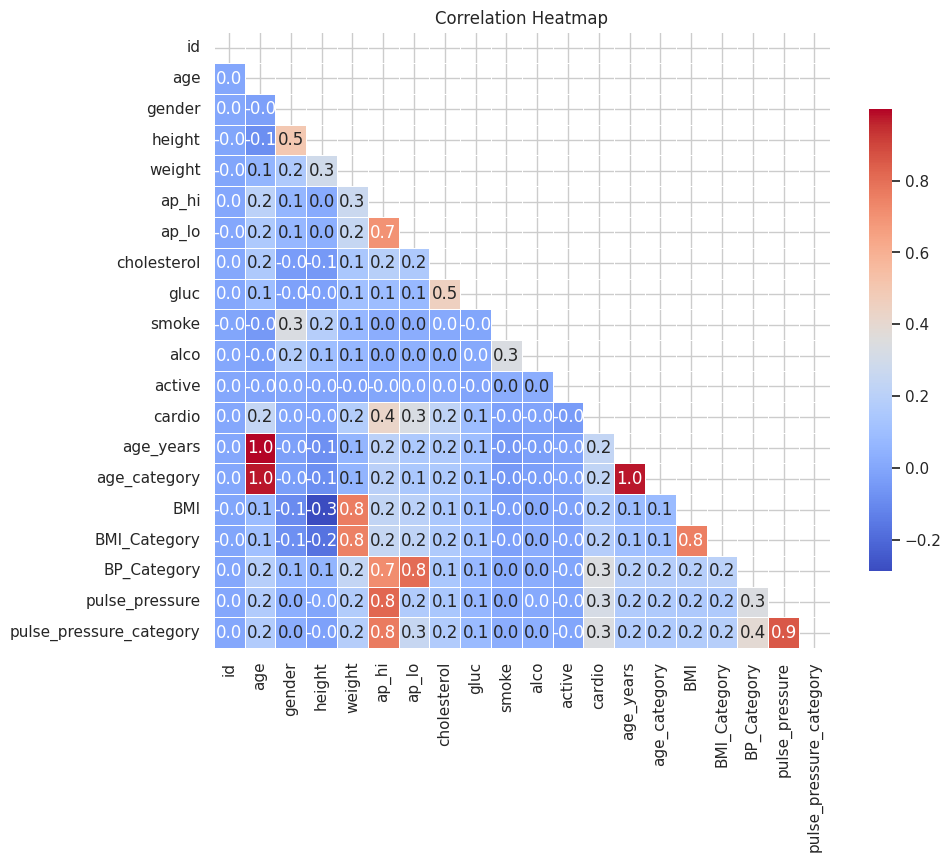

In [ ]:
# Generate a mask for the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure and draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".1f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Selecting features with the highest correlation with the target variable 'Cardio'
features = ['age_category', 'BMI_Category', 'BP_Category', 'pulse_pressure_category', 'cholesterol', 'gluc']

# Select features for clustering
X = filtered_data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

```python
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to find the optimal number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()
```
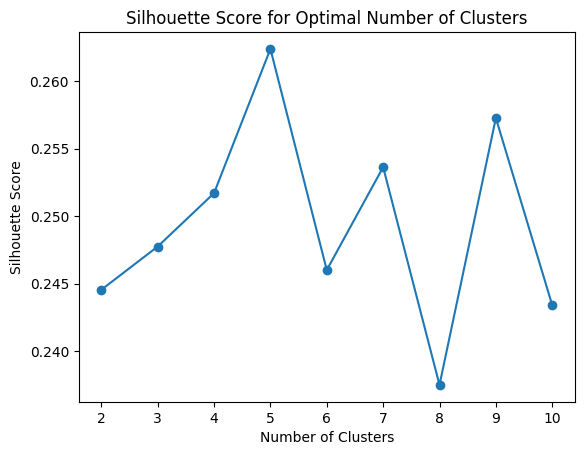

From the graph above the optimal number of clusters is 5.

In [ ]:
# Switch Dataframe storage label
df = filtered_data

# Using the clusters achieved from the silhouette scoring above
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to the original dataset
df['cluster'] = clusters

# Computing the size of the clusters
cluster_sizes = df['cluster'].value_counts().sort_index()
print(cluster_sizes)

cluster
0    16734
1    10318
2    10363
3    11449
4    19908
Name: count, dtype: int64


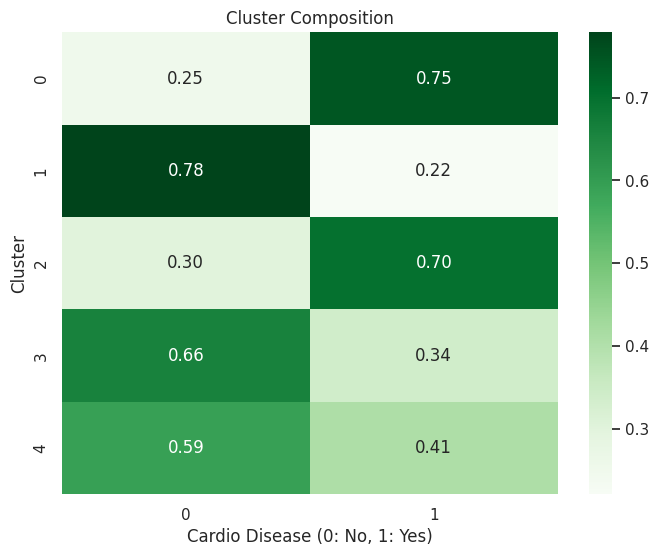

In [ ]:
# Check cluster composition
cluster_composition = pd.crosstab(df['cluster'], df['cardio'])

# Normalize the counts to get proportions
cluster_composition = cluster_composition.div(cluster_composition.sum(axis=1), axis=0)

# Plot cluster composition
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_composition, annot=True, cmap='Greens', fmt='.2f')
plt.title('Cluster Composition')
plt.xlabel('Cardio Disease (0: No, 1: Yes)')
plt.ylabel('Cluster')
plt.show()

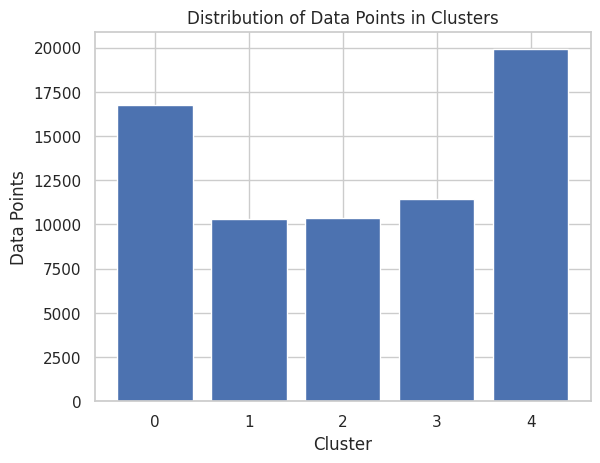

In [ ]:
#Plotting clusters against the size of the cluster
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Data Points')
plt.title('Distribution of Data Points in Clusters')
plt.xticks(cluster_sizes.index)
plt.show()

**Interpretation**

- **Cluster 0:** Highest prevalence of cardiovascular disease (75% of individuals have it).
- **Cluster 1:**Lowest prevalence of cardiovascular disease (22%  have it).
- **Cluster 2:** Second highest prevalence of cardiovascular disease (70%  have it).
- **Cluster 3:** Second lowest prevalence of cardiovascular disease (34% have it).
- **Cluster 4:** Mixed prevalence of cardiovascular disease (59% do not have it).

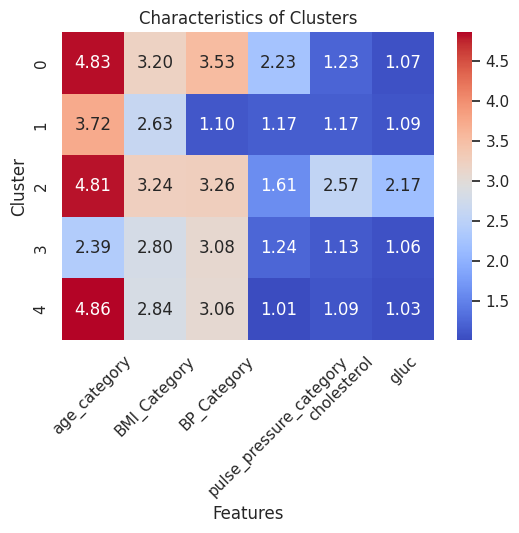

In [ ]:
# Calculate mean values of features within each cluster
cluster_means = df.groupby('cluster').mean()
# Plot characteristics of the clusters
plt.figure(figsize=(6, 4))
sns.heatmap(cluster_means[features], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Characteristics of Clusters')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.show()

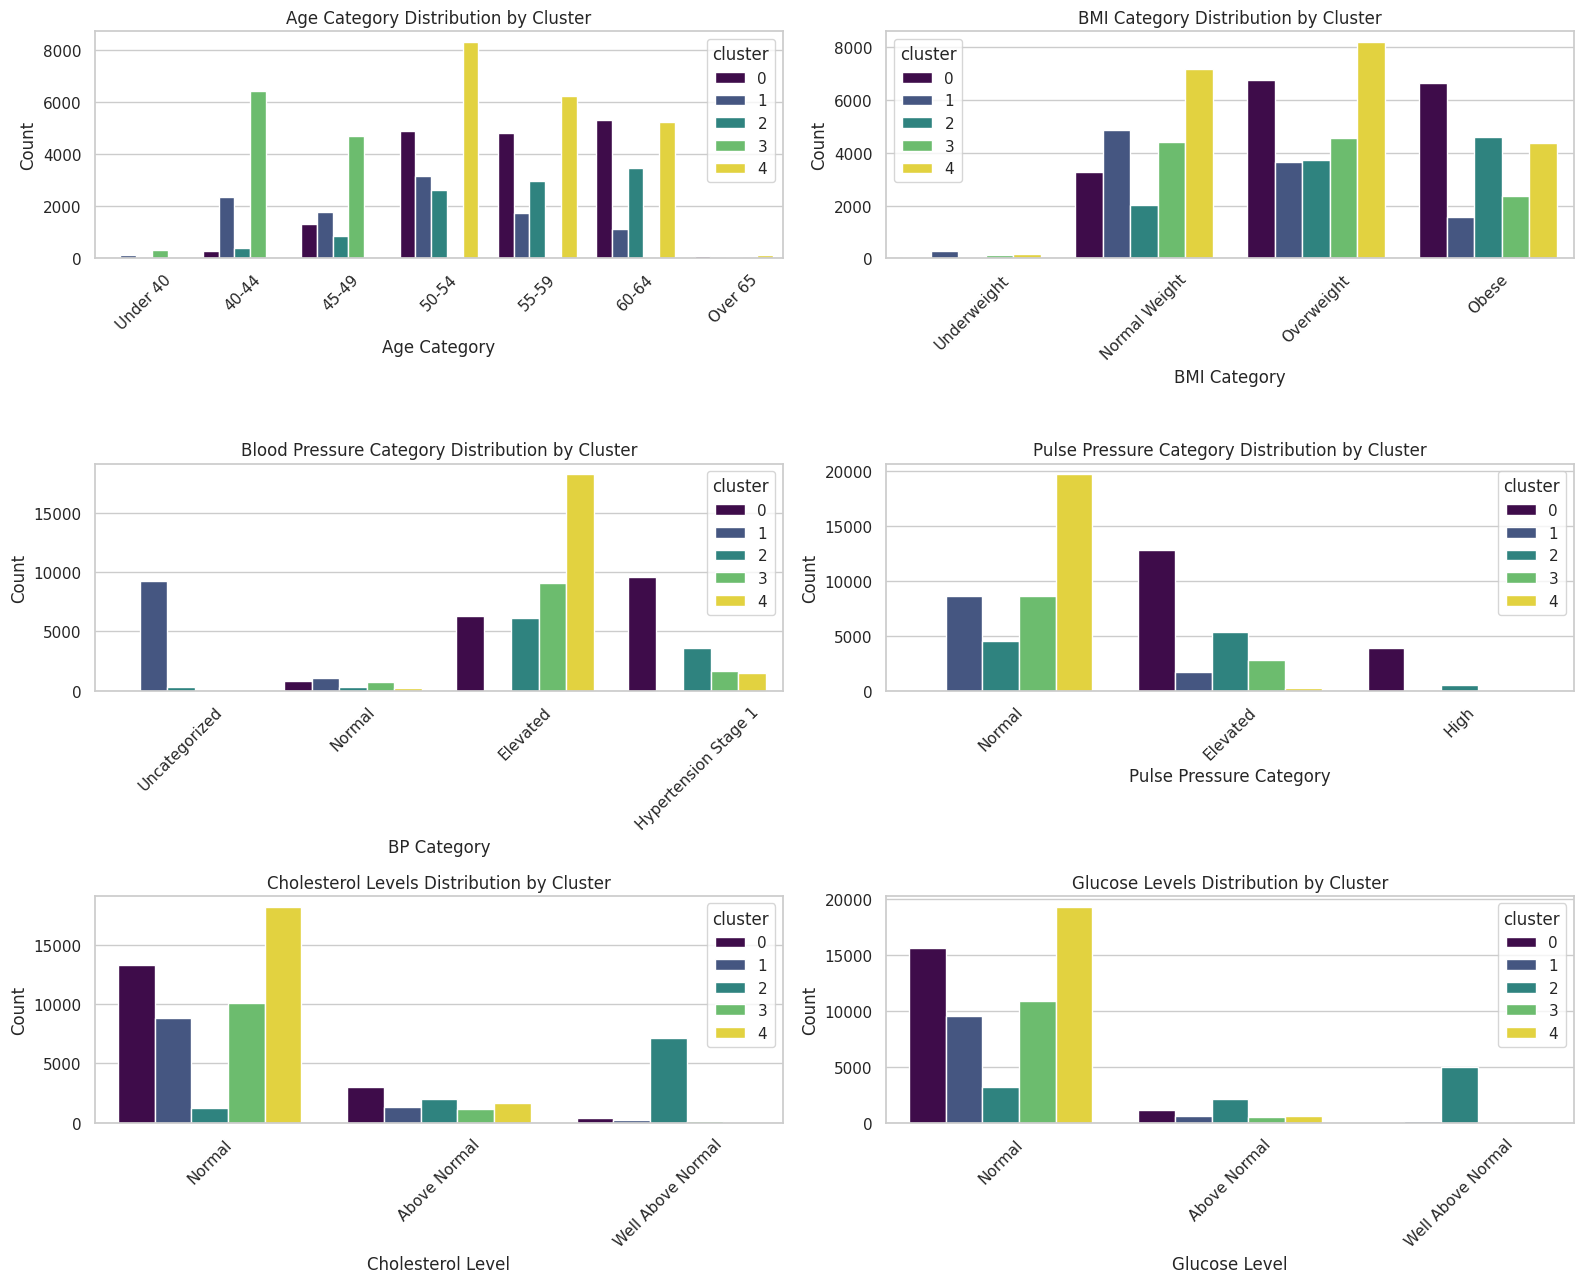

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# Set the correct X-Axis labels
age_category_labels = ['Under 40', '40-44', '45-49', '50-54', '55-59', '60-64', 'Over 65']
BMI_Category_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
BP_Category_labels = ['Uncategorized', 'Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis']
pulse_pressure_category_labels = ['Normal', 'Elevated', 'High']
cholesterol_labels = ['Normal', 'Above Normal', 'Well Above Normal']
gluc_labels = ['Normal', 'Above Normal', 'Well Above Normal']

# Create a figure to contain the subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 13))

# Plotting each category distribution by clusters
sns.countplot(ax=axes[0, 0], x='age_category', hue='cluster', data=df, palette='viridis')
axes[0, 0].set_title('Age Category Distribution by Cluster')
axes[0, 0].set_xlabel('Age Category')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xticklabels(age_category_labels)

sns.countplot(ax=axes[0, 1], x='BMI_Category', hue='cluster', data=df, palette='viridis')
axes[0, 1].set_title('BMI Category Distribution by Cluster')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_xticklabels(BMI_Category_labels)

sns.countplot(ax=axes[1, 0], x='BP_Category', hue='cluster', data=df, palette='viridis')
axes[1, 0].set_title('Blood Pressure Category Distribution by Cluster')
axes[1, 0].set_xlabel('BP Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xticklabels(BP_Category_labels)

sns.countplot(ax=axes[1, 1], x='pulse_pressure_category', hue='cluster', data=df, palette='viridis')
axes[1, 1].set_title('Pulse Pressure Category Distribution by Cluster')
axes[1, 1].set_xlabel('Pulse Pressure Category')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_xticklabels(pulse_pressure_category_labels)

sns.countplot(ax=axes[2, 0], x='cholesterol', hue='cluster', data=df, palette='viridis')
axes[2, 0].set_title('Cholesterol Levels Distribution by Cluster')
axes[2, 0].set_xlabel('Cholesterol Level')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].set_xticklabels(cholesterol_labels)

sns.countplot(ax=axes[2, 1], x='gluc', hue='cluster', data=df, palette='viridis')
axes[2, 1].set_title('Glucose Levels Distribution by Cluster')
axes[2, 1].set_xlabel('Glucose Level')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].set_xticklabels(gluc_labels,)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Cluster Summaries:

- **Cluster 0 - The High-Risk Elderly:** This cluster is marked by the oldest average age and elevated mean values for both blood pressure and cholesterol. This group's health metrics suggest a higher prevalence of age-related cardiovascular risks, warranting close medical attention and potential intervention.

- **Cluster 1 - The Younger, Healthier Subset:** Patients in this cluster present the healthiest profile, with the lowest average cholesterol and glucose levels among all clusters. The youthful demographic of this cluster aligns with the favorable health indicators, suggesting a current low cardiovascular risk.

- **Cluster 2 - The Metabolic Challenge Group:** Exhibiting the highest average blood pressure and substantial mean cholesterol and glucose levels, this cluster is indicative of a significant metabolic syndrome risk. These individuals are prime candidates for aggressive lifestyle and medicinal strategies to manage hypertension and glucose metabolism.

- **Cluster 3 - Young, Yet at Risk:** Despite having the lowest mean age, this cluster shows high mean BMI and BP categories. The juxtaposition of youth with emerging risk factors implies a critical window for effective lifestyle modifications to prevent long-term health complications.

- **Cluster 4 - Well-managed Mature Group:** Patients in this cluster, while similar in age to Cluster 0, display better-controlled health parameters, with the lowest average values for BP, cholesterol, and glucose. It represents an older group that appears to manage their health effectively, possibly through proactive healthcare engagement and treatment adherence.

**Conclusions:**\
The cluster analysis highlights diverse health profiles within the patient population, identifying both high-risk groups and those with better-managed health parameters. The insights provided by the clustering enable targeted healthcare strategies to improve patient outcomes. For high-risk clusters, especially Cluster 0 and Cluster 2, heightened medical supervision is advised. In contrast, Clusters 1 and 4 can continue preventive care and regular health monitoring. Cluster 3's juxtaposition of youth and elevated BMI/BP suggests prioritizing preventive care to mitigate the risk of future health issues.

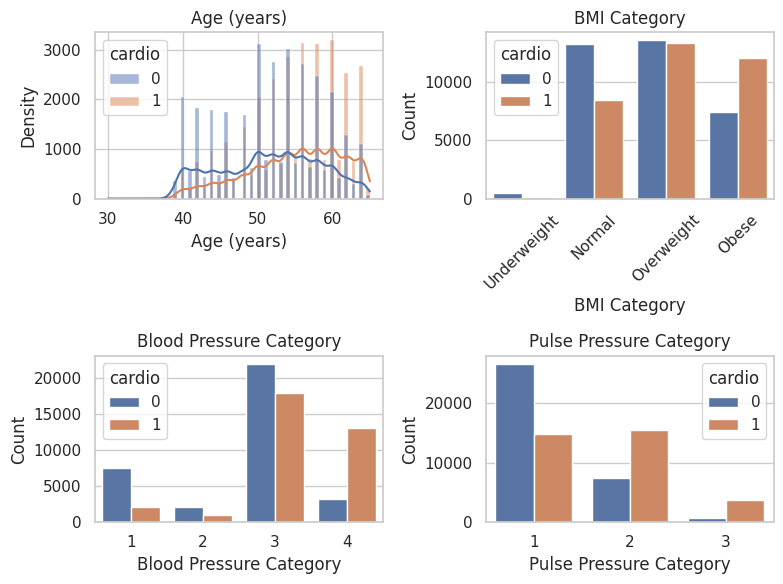

In [ ]:
#relationship between cardiovascular disease and BMI category,BP category,pulse pressure, age in years

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
bp_labels = ['Normal', 'Elevated', 'Stage 1', 'Stage 2', 'Crisis']
pulse_labels = ['Low', 'Normal', 'High']

# Plotting the distribution of age_years for individuals with and without cardio
sns.histplot(data=df, x='age_years', hue='cardio', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age (years)')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Density')

# Plotting the distribution of BMI_Category for individuals with and without cardio
sns.countplot(data=df, x='BMI_Category', hue='cardio', ax=axes[0, 1])
axes[0, 1].set_title('BMI Category')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(bmi_labels, rotation=45)

# Plotting the distribution of BP_Category for individuals with and without cardio
sns.countplot(data=df, x='BP_Category', hue='cardio', ax=axes[1, 0])
axes[1, 0].set_title('Blood Pressure Category')
axes[1, 0].set_xlabel('Blood Pressure Category')
axes[1, 0].set_ylabel('Count')

# Plotting the distribution of pulse_pressure_category for individuals with and without cardio
sns.countplot(data=df, x='pulse_pressure_category', hue='cardio', ax=axes[1, 1])
axes[1, 1].set_title('Pulse Pressure Category')
axes[1, 1].set_xlabel('Pulse Pressure Category')
axes[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


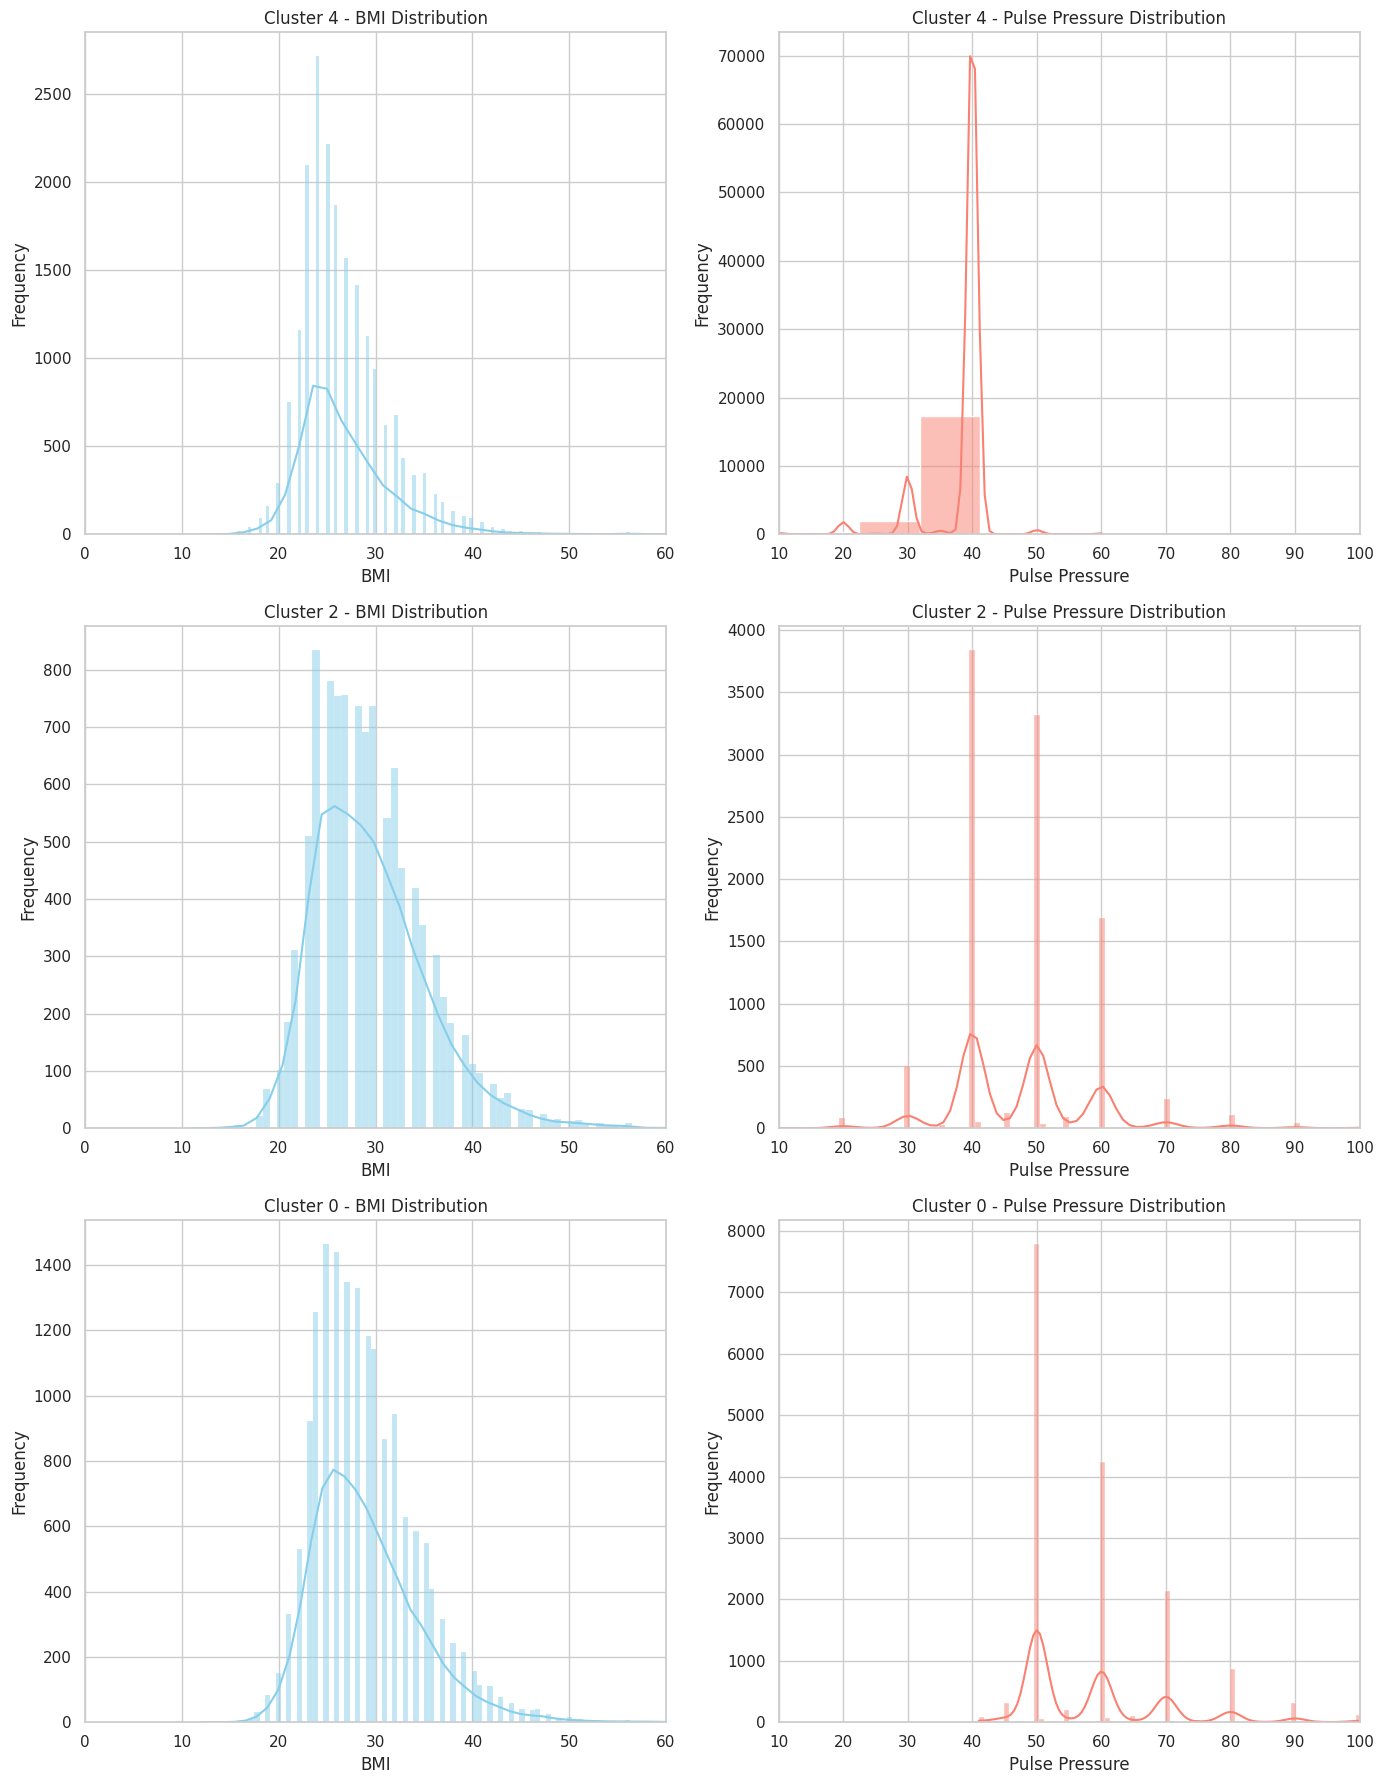

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for BMI and blood pressure by cluster
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
clusters = df['cluster'].unique()
# Determine uniform axis limits for BMI and Pulse Pressure
bmi_xlim = (0, 60)  # Assuming BMI won't reasonably be more than 60
pulse_xlim = (10, 100)  # Assuming Pulse Pressure won't reasonably be beyond this range

for i, ax in enumerate(axes.flatten()):
    cluster_data = df[df['cluster'] == clusters[i // 2]]
    if i % 2 == 0:
        sns.histplot(cluster_data['BMI'], kde=True, color='skyblue', ax=ax)
        ax.set_title(f'Cluster {clusters[i // 2]} - BMI Distribution')
        ax.set_xlabel('BMI')
        ax.set_ylabel('Frequency')
        ax.set_xlim(bmi_xlim)  # Set consistent x-axis limits
    else:
        sns.histplot(cluster_data['pulse_pressure'], kde=True, color='salmon', ax=ax)
        ax.set_title(f'Cluster {clusters[i // 2]} - Pulse Pressure Distribution')
        ax.set_xlabel('Pulse Pressure')
        ax.set_ylabel('Frequency')
        ax.set_xlim(pulse_xlim)  # Set consistent x-axis limits

# Adjust the spacing between the subplots if needed
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.tight_layout()
plt.show()


In [ ]:
cluster_distribution = df['cluster'].value_counts().sort_index()
cluster_distribution, kmeans.cluster_centers_

(cluster
 0    16734
 1    10318
 2    10363
 3    11449
 4    19908
 Name: count, dtype: int64,
 array([[ 0.42135668,  0.30949063,  0.67002995,  1.26095447, -0.19723957,
         -0.27694302],
        [-0.40395311, -0.40470218, -1.98771866, -0.47898147, -0.28777311,
         -0.2305771 ],
        [ 0.4064751 ,  0.36865344,  0.3817194 ,  0.24333414,  1.77355369,
          1.65316429],
        [-1.39139405, -0.18850318,  0.17996306, -0.35336914, -0.34443717,
         -0.29126712],
        [ 0.44378012, -0.13388999,  0.16480032, -0.735113  , -0.41018816,
         -0.34074569]]))

# Modelling

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'age_category', 'BMI', 'BMI_Category', 'BP_Category', 'pulse_pressure',
       'pulse_pressure_category', 'cluster'],
      dtype='object')

In [ ]:
# Selecting features and target variable
X = df[['BMI_Category', 'BP_Category', 'pulse_pressure_category', 'cholesterol', 'gluc', 'age_category']]
y = df['cardio']

# Splitting the data into train+validation (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the train+validation into train (75%) and validation (25%) to achieve overall 60%, 20%, 20% distribution
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Check the sizes of each dataset
X_train.shape, X_val.shape, X_test.shape

((41262, 6), (13755, 6), (13755, 6))

Linear Regression Model Performance:
Accuracy: 0.7133406034169393
ROC AUC Score: 0.7763864270613108
Recall: 0.6443636363636364
Precision: 0.7473009446693657
Root Mean Squared Error (RMSE): 0.44255496716948906


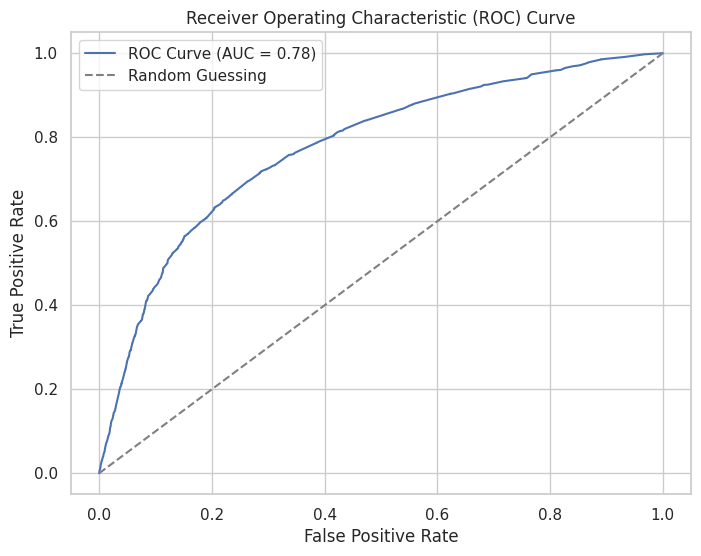

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, np.round(y_pred))
precision = precision_score(y_test, np.round(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression Model Performance:")
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Recall:", recall)
print("Precision:", precision)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Helper function to calculate metrics
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_prob_val = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_pred_val

    metrics = {
        'Train Accuracy': round(accuracy_score(y_train, y_pred_train) * 100, 2),
        'Validation Accuracy': round(accuracy_score(y_val, y_pred_val) * 100, 2),
        'Validation ROC AUC': round(roc_auc_score(y_val, y_pred_prob_val) * 100, 2) if hasattr(model, "predict_proba") else None,
        'Validation Recall': round(recall_score(y_val, y_pred_val) * 100, 2),
        'Validation Precision': round(precision_score(y_val, y_pred_val) * 100, 2)
    }
    if hasattr(model, "predict_proba"):
        metrics['Validation RMSE'] = round(math.sqrt(mean_squared_error(y_val, y_pred_prob_val)), 2)
    return metrics

# Define models and parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Decision Tree': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
}

# # Split training data to include a validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize results DataFrame
results_df = pd.DataFrame()

# Model evaluation and tuning
for name, model in models.items():
    metrics_before = evaluate_model(model, X_train, y_train, X_val, y_val)
    grid_search = GridSearchCV(estimator=model, param_grid=params[name], cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    model.set_params(**grid_search.best_params_)
    metrics_after = evaluate_model(model, X_train, y_train, X_val, y_val)

    for metric, value in metrics_before.items():
        if value is not None:  # Ensure the metric was calculable before appending
            result_row = {
                'Model': [name],
                'Metric': [metric],
                'Before Tuning': [value],
                'After Tuning': [metrics_after.get(metric)]
            }
            try:
                results_df = results_df.append(pd.DataFrame(result_row), ignore_index=True)
            except AttributeError:
                results_df = pd.concat([results_df, pd.DataFrame(result_row)], ignore_index=True)

# Show results and variance after tuning
results_df['Difference'] = results_df['After Tuning'] - results_df['Before Tuning']

# Convert the DataFrame to an HTML table; html_table is a string containing the HTML table code
html_table = results_df.to_html(index=False, escape=False)

display(HTML(html_table))

Model,Metric,Before Tuning,After Tuning,Difference
Logistic Regression,Train Accuracy,70.81,70.81,0.00
Logistic Regression,Validation Accuracy,70.38,70.38,0.00
Logistic Regression,Validation ROC AUC,76.87,76.87,0.00
Logistic Regression,Validation Recall,63.75,63.75,0.00
Logistic Regression,Validation Precision,73.11,73.11,0.00
Logistic Regression,Validation RMSE,0.44,0.44,0.00
Random Forest,Train Accuracy,72.34,72.05,-0.29
Random Forest,Validation Accuracy,70.43,70.73,0.30
Random Forest,Validation ROC AUC,76.88,77.57,0.69
Random Forest,Validation Recall,64.66,64.66,0.00


In [ ]:
# Visualizing the results

# Pivot the DataFrame
pivot_df = results_df.pivot_table(index='Model', columns='Metric', values=['Before Tuning', 'After Tuning'], aggfunc='first')

# Obtain the column names for 'Before Tuning' and 'After Tuning'
before_tuning_cols = [col for col in pivot_df.columns if 'Before Tuning' in col]
after_tuning_cols = [col for col in pivot_df.columns if 'After Tuning' in col]

# Concatenate the 'Before Tuning' and 'After Tuning' columns side by side
pivot_df = pd.concat([pivot_df[before_tuning_cols], pivot_df[after_tuning_cols]], axis=1)

# Now, highlight_changes function should work correctly
def highlight_changes(row):
    styles = pd.Series('', index=row.index)
    for before_col, after_col in zip(before_tuning_cols, after_tuning_cols):
        if row[after_col] > row[before_col]:
            styles[after_col] = 'background-color: #98FB98'  # green for improvement
        elif row[after_col] < row[before_col]:
            styles[after_col] = 'background-color: #FF6347'  # red for decline
        else:
            styles[after_col] = ''  # no change for equal values
    return styles

# Apply the styling function to the DataFrame
styled_df = pivot_df.style.apply(highlight_changes, axis=1).format("{:.2f}")

# Display the styled DataFrame
styled_df


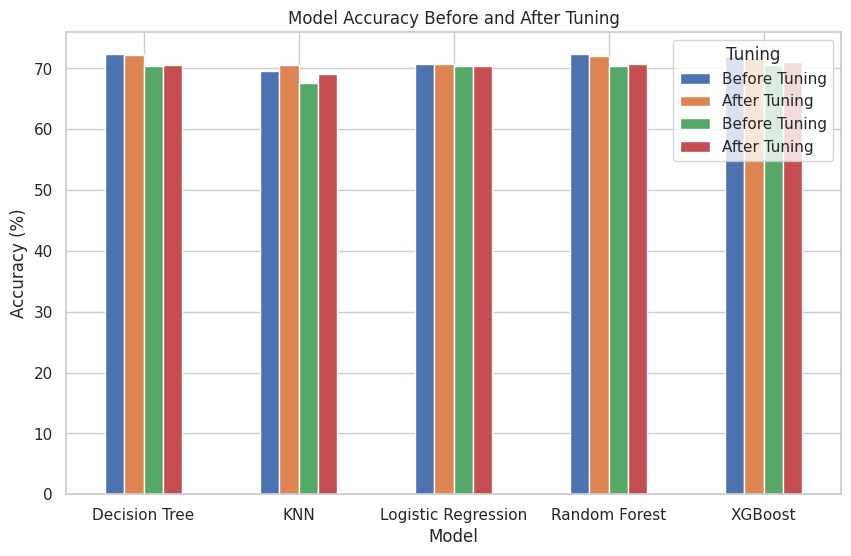

In [ ]:
# Visualize 'Train Accuracy' and 'Validation Accuracy' comparison
# Extract the relevant metrics from pivot_df
train_accuracy_df = pivot_df.xs('Train Accuracy', level='Metric', axis=1)
validation_accuracy_df = pivot_df.xs('Validation Accuracy', level='Metric', axis=1)

# Combine both train and validation accuracy into one DataFrame for plotting
accuracy_df = pd.concat([train_accuracy_df, validation_accuracy_df], axis=1)

# Now plot the combined accuracy DataFrame
accuracy_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Accuracy Before and After Tuning')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Tuning')
plt.show()


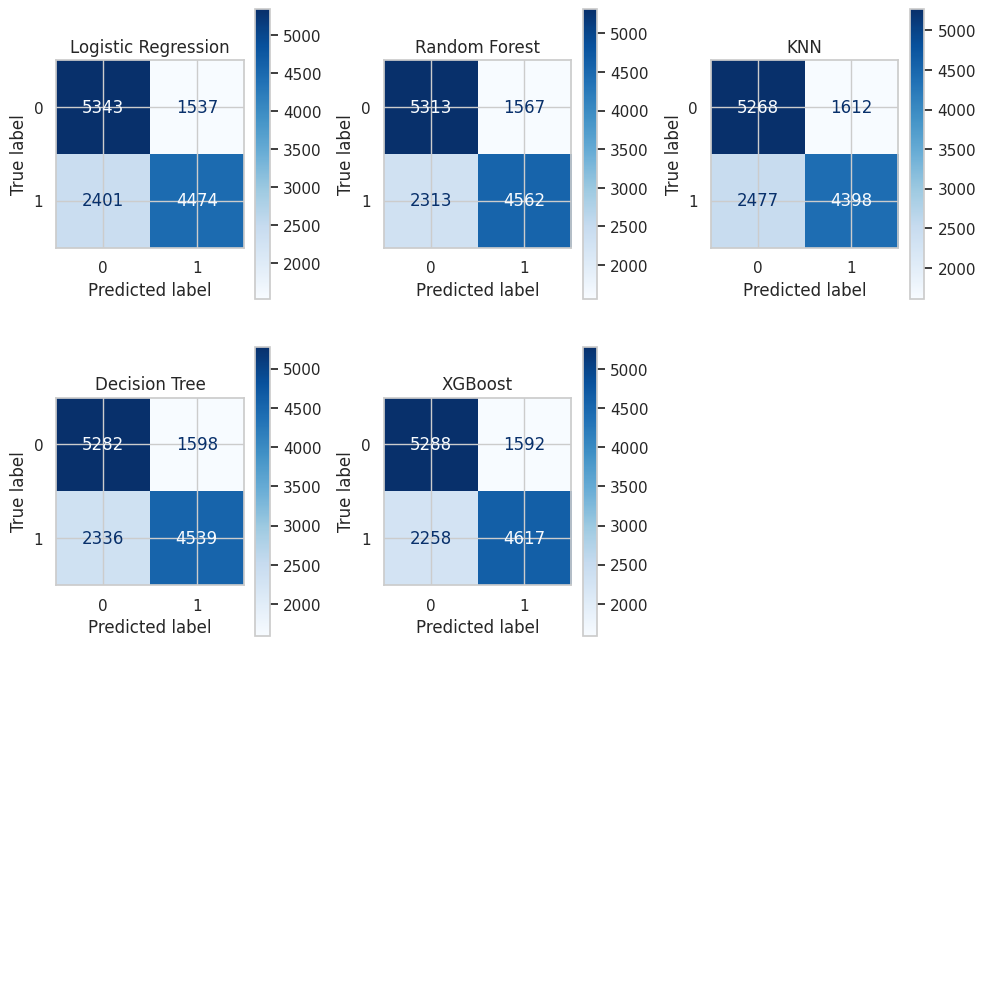

In [ ]:
def plot_confusion_matrices(models, X_test, y_test):
    # Calculate subplot grid size needed (square root of the number of models, rounded up)
    n = len(models)
    rows = cols = int(n**0.5) + (1 if n**0.5 % 1 else 0)

    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
    axes = axes.flatten()

    for i, (name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap=plt.cm.Blues)
        axes[i].title.set_text(name)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

#Visualize Resuts:
plot_confusion_matrices(models, X_test, y_test)


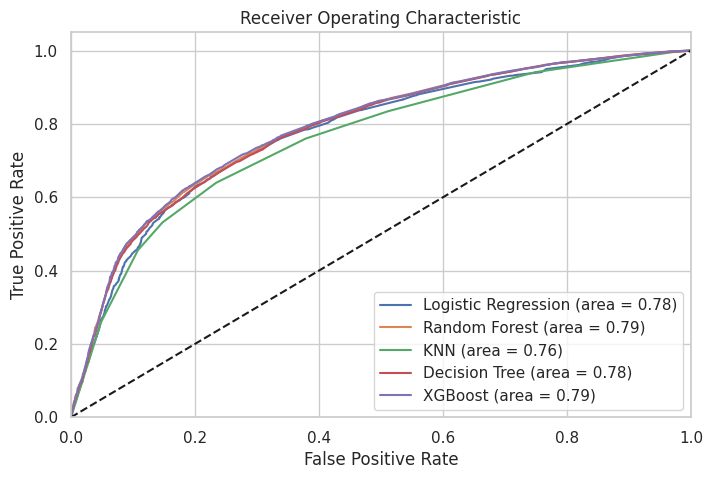

In [ ]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 5))

    for name, model in models.items():
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(models, X_test, y_test)

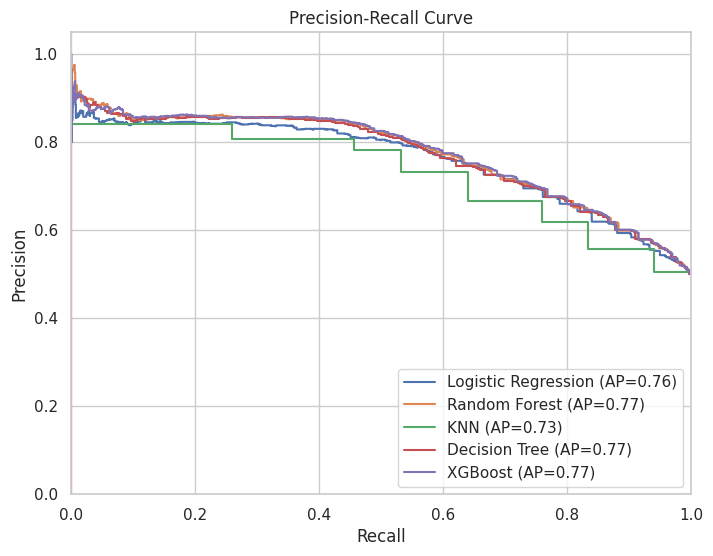

In [ ]:
# Visualize Precision Recall Metrics

def plot_precision_recall_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
        ap = average_precision_score(y_test, y_pred_prob)
        plt.step(recall, precision, where='post', label=f'{name} (AP={ap:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()

plot_precision_recall_curves(models, X_test, y_test)


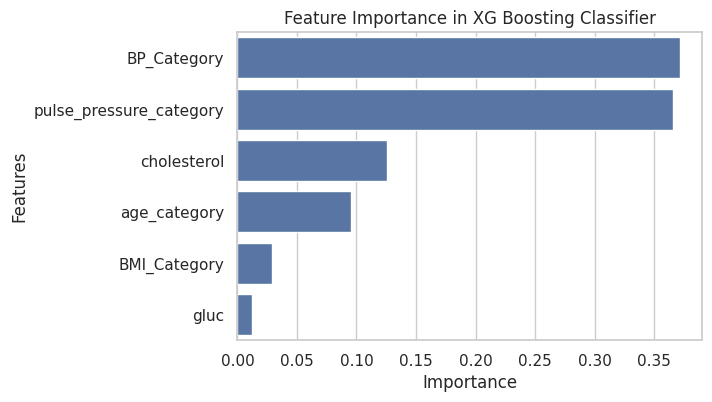

In [ ]:
# Feature Importance Analysis

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_

# Using the X_Train Features
feature_names = X_train.columns

# Create a DataFrame to hold the feature names and their importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title('Feature Importance in XG Boosting Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Using previously defined models as base models
stacking_clf = StackingClassifier(
    estimators=[('knn', KNeighborsClassifier()),
                ('lr', LogisticRegression()),
                ('rf', RandomForestClassifier()),
                ('dt', DecisionTreeClassifier())],
    final_estimator=XGBClassifier()
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier
stacking_accuracy = stacking_clf.score(X_test, y_test)

In [ ]:
# Export Models for Deployment

# Save the clustering and predictive models
joblib.dump(stacking_clf, 'stacking_classifier_model.pkl')
joblib.dump(kmeans, 'patient_clustering_model.pkl')

['patient_clustering_model.pkl']